# Lesson 3 Python

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [1]:
df = pd.read_csv('../../Data/avocados.csv')

In [19]:
df = df.loc[df['region'].isin(['Indianapolis', 'Orlando', 'PhoenixTucson'])]

In [20]:
df.groupby('region').mean()['AveragePrice']

region
Indianapolis     1.313994
Orlando          1.506213
PhoenixTucson    1.224438
Name: AveragePrice, dtype: float64

In [21]:
df['RegionsNum'] = df['region'].replace(['Indianapolis', 'Orlando', 'PhoenixTucson'],[0,1,2])
df = df[['AveragePrice', 'RegionsNum']]

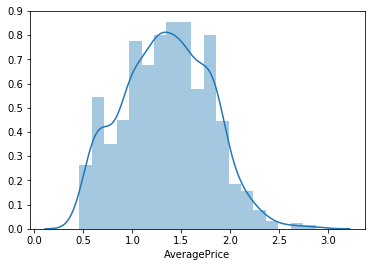

In [22]:
sns.distplot(df['AveragePrice'])

In [23]:
scipy.stats.bartlett(df['AveragePrice'], df['RegionsNum'])

BartlettResult(statistic=370.1318985501912, pvalue=1.7517644825407276e-82)

In [24]:
scipy.stats.fligner(df['AveragePrice'], df['RegionsNum'])

FlignerResult(statistic=262.01883292247567, pvalue=6.229672162065104e-59)

In [25]:
postHoc = MultiComparison(df['AveragePrice'], df['RegionsNum'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.1922   0.116   0.2685  True 
  0      2    -0.0896  -0.1658 -0.0133  True 
  1      2    -0.2818   -0.358 -0.2055  True 
---------------------------------------------


# stats_model - heteroscedasticity corrected coefficient covariance matrix in the .anova_lm() 

# F-Oneway

In [29]:
stats.f_oneway(df.loc[df['RegionsNum']==0]["AveragePrice"],
                   df.loc[df['RegionsNum']==1]["AveragePrice"],
                    df.loc[df['RegionsNum']==2]["AveragePrice"])

F_onewayResult(statistic=39.27005113498051, pvalue=3.760638188860114e-17)